- Создание, изменение и удаление признаков
- Группировки данных
- Объединение таблиц
- Встроенные визуализации

Будем работать с датасетом по оттоку клиентов из банка
https://www.kaggle.com/datasets/shubh0799/churn-modelling, но датасет из себя будет представлять две таблицы:

1. Личные данные клиента
    - A. CustomerId - Уникальный идентификатор клиента
    - B. Surname - Фамилия клиента
    - C. Geography - Из какой страны клиент
    - D. Gender - Пол клиента
    - E. Age - Возраст клиента
    - F. EstimatedSalary - Предположительная зарплата клиента
2. Данные по поведению клиента в банке
    - A. CustomerId - Уникальный идентификатор клиента
    - B. CustomerId - Уникальный идентификатор клиента
    - C. Tenure - Сколько лет человек является клиентом банка
    - D. Balance - Баланс счета
    - E. NumOfProducts - Количество открытых продуктов
    - F. HasCrCard - Есть ли у клиента кредитная карта
    - G. IsActiveMember - Является ли клиент активные участником
    - H. Exited - Уйдет ли человек в отток

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
users = df[['CustomerId', 'Surname', 'Geography', 'Gender', 'Age', 'EstimatedSalary']].copy()
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.10


In [4]:
users.shape

(10000, 6)

### Создание новых признаков

In [5]:
users['New_feature'] = 0
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,New_feature
0,15634602,Hargrave,France,Female,42,101348.88,0
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
4,15737888,Mitchell,Spain,Female,43,79084.10,0


In [6]:
users['Age_(days)'] = users['Age'] * 365
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,New_feature,Age_(days)
0,15634602,Hargrave,France,Female,42,101348.88,0,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695


In [7]:
for i, row in users.iloc[:2].iterrows():
    print(row)
    print('___' * 30)

CustomerId          15634602
Surname             Hargrave
Geography             France
Gender                Female
Age                       42
EstimatedSalary    101348.88
New_feature                0
Age_(days)             15330
Name: 0, dtype: object
__________________________________________________________________________________________
CustomerId          15647311
Surname                 Hill
Geography              Spain
Gender                Female
Age                       41
EstimatedSalary    112542.58
New_feature                0
Age_(days)             14965
Name: 1, dtype: object
__________________________________________________________________________________________


In [8]:
age_days = []

for i, row in users.iterrows():
    age_days.append(row['Age']*365)
    
age_days[:10]

[15330, 14965, 15330, 14235, 15695, 16060, 18250, 10585, 16060, 9855]

In [9]:
users['Age (days) 2'] = age_days
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,New_feature,Age_(days),Age (days) 2
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695,15695
...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,Male,39,96270.64,0,14235,14235
9996,15569892,Johnstone,France,Male,35,101699.77,0,12775,12775
9997,15584532,Liu,France,Female,36,42085.58,0,13140,13140
9998,15682355,Sabbatini,Germany,Male,42,92888.52,0,15330,15330


In [10]:
def age_to_days(x):
    return x*365

users['Age (days) 3'] = users['Age'].apply(age_to_days)
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,New_feature,Age_(days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695,15695,15695
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,Male,39,96270.64,0,14235,14235,14235
9996,15569892,Johnstone,France,Male,35,101699.77,0,12775,12775,12775
9997,15584532,Liu,France,Female,36,42085.58,0,13140,13140,13140
9998,15682355,Sabbatini,Germany,Male,42,92888.52,0,15330,15330,15330


In [11]:
import time
from tqdm import tqdm
tqdm.pandas()

def age_to_days(x):
    time.sleep(0.001)
    return x*365

users['Age'].progress_apply(age_to_days)

100%|██████████| 10000/10000 [02:36<00:00, 64.08it/s]


0       15330
1       14965
2       15330
3       14235
4       15695
        ...  
9995    14235
9996    12775
9997    13140
9998    15330
9999    10220
Name: Age, Length: 10000, dtype: int64

### Удаление признаков

In [13]:
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,New_feature,Age_(days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695,15695,15695


In [14]:
users.drop(columns='New_feature')
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,New_feature,Age_(days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695,15695,15695


In [15]:
users = users.drop(columns='New_feature')
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Age_(days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,15695,15695,15695


In [16]:
users['New_feature'] = 0
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Age_(days),Age (days) 2,Age (days) 3,New_feature
0,15634602,Hargrave,France,Female,42,101348.88,15330,15330,15330,0
1,15647311,Hill,Spain,Female,41,112542.58,14965,14965,14965,0
2,15619304,Onio,France,Female,42,113931.57,15330,15330,15330,0
3,15701354,Boni,France,Female,39,93826.63,14235,14235,14235,0
4,15737888,Mitchell,Spain,Female,43,79084.10,15695,15695,15695,0


In [18]:
users.drop(columns='New_feature', inplace=True) #inplace - сразу заменяет исходный датафрейм
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Age_(days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,15695,15695,15695


In [19]:
users.drop(columns = ['Age_(days)', 'Age (days) 2', 'Age (days) 3'], inplace=True)
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.10


## Изменение существующих признаков

### .loc

In [20]:
users['target'] = 0
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,0
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
4,15737888,Mitchell,Spain,Female,43,79084.10,0


In [21]:
users.loc[users['Geography'] == 'France']

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
6,15592531,Bartlett,France,Male,50,10062.80,0
8,15792365,He,France,Male,44,74940.50,0
...,...,...,...,...,...,...,...
9994,15719294,Wood,France,Female,29,167773.55,0
9995,15606229,Obijiaku,France,Male,39,96270.64,0
9996,15569892,Johnstone,France,Male,35,101699.77,0
9997,15584532,Liu,France,Female,36,42085.58,0


In [22]:
users.loc[users['Geography'] == 'France', 'target']

0       0
2       0
3       0
6       0
8       0
       ..
9994    0
9995    0
9996    0
9997    0
9999    0
Name: target, Length: 5014, dtype: int64

In [24]:
users.loc[users['Geography'] == 'France', 'target'] = 1
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,1
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,1
3,15701354,Boni,France,Female,39,93826.63,1
4,15737888,Mitchell,Spain,Female,43,79084.10,0


### .replace

In [25]:
users['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,F,42,101348.88,1
1,15647311,Hill,Spain,F,41,112542.58,0
2,15619304,Onio,France,F,42,113931.57,1
3,15701354,Boni,France,F,39,93826.63,1
4,15737888,Mitchell,Spain,F,43,79084.10,0


## Методы агрегации

In [28]:
users['Age'].agg(['min', 'max'])

min    18
max    92
Name: Age, dtype: int64

In [29]:
users.agg({
    'Age': ['min', 'max'],
    'EstimatedSalary': 'mean'
})

,Age,EstimatedSalary
min,18.0,NaN
max,92.0,NaN
mean,NaN,100090.239881


In [31]:
users.agg(
    min_age=('Age', 'min'),
    max_age=('Age', 'max'),
    mean_salary=('EstimatedSalary', 'mean')
)

,Age,EstimatedSalary
min_age,18.0,NaN
max_age,92.0,NaN
mean_salary,NaN,100090.239881


## Методы объединения

In [56]:
bank = df[['CustomerId', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()
bank

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,2,0.00,1,1,1,1
1,15647311,608,1,83807.86,1,0,1,0
2,15619304,502,8,159660.80,3,1,0,1
3,15701354,699,1,0.00,2,0,0,0
4,15737888,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...
9995,15606229,771,5,0.00,2,1,0,0
9996,15569892,516,10,57369.61,1,1,1,0
9997,15584532,709,7,0.00,1,0,1,1
9998,15682355,772,3,75075.31,2,1,0,1


In [57]:
bank.drop(bank.index[9895:10000], axis=0, inplace=True)
bank

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,2,0.00,1,1,1,1
1,15647311,608,1,83807.86,1,0,1,0
2,15619304,502,8,159660.80,3,1,0,1
3,15701354,699,1,0.00,2,0,0,0
4,15737888,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...
9890,15670427,662,4,155187.30,1,1,0,0
9891,15731755,680,10,0.00,2,1,0,0
9892,15796370,604,5,155455.43,1,0,1,0
9893,15598331,764,9,100480.53,1,1,0,0


In [58]:
bank.shape

(9895, 8)

### merge

In [201]:
merge = users.merge(bank, left_on='CustomerId', right_on='CustomerId')
merge

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,France,F,42,101348.88,1,619,2,0.00,1,1,1,1
1,15647311,Hill,Spain,F,41,112542.58,0,608,1,83807.86,1,0,1,0
2,15619304,Onio,France,F,42,113931.57,1,502,8,159660.80,3,1,0,1
3,15701354,Boni,France,F,39,93826.63,1,699,1,0.00,2,0,0,0
4,15737888,Mitchell,Spain,F,43,79084.10,0,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,15670427,Chidi,Spain,M,37,48930.80,0,662,4,155187.30,1,1,0,0
9891,15731755,Hull,France,M,49,187008.45,1,680,10,0.00,2,1,0,0
9892,15796370,Shah,Spain,M,40,113581.85,0,604,5,155455.43,1,0,1,0
9893,15598331,Morgan,France,F,40,124095.69,1,764,9,100480.53,1,1,0,0


### join

In [64]:
users_id = users.set_index('CustomerId')
users_id

,Surname,Geography,Gender,Age,EstimatedSalary,target
CustomerId,,,,,,
15634602,Hargrave,France,F,42,101348.88,1
15647311,Hill,Spain,F,41,112542.58,0
15619304,Onio,France,F,42,113931.57,1
15701354,Boni,France,F,39,93826.63,1
15737888,Mitchell,Spain,F,43,79084.10,0
...,...,...,...,...,...,...
15606229,Obijiaku,France,M,39,96270.64,1
15569892,Johnstone,France,M,35,101699.77,1
15584532,Liu,France,F,36,42085.58,1


In [69]:
bank_id = bank.set_index('CustomerId')
bank_id

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CustomerId,,,,,,,
15634602,619,2,0.00,1,1,1,1
15647311,608,1,83807.86,1,0,1,0
15619304,502,8,159660.80,3,1,0,1
15701354,699,1,0.00,2,0,0,0
15737888,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...
15670427,662,4,155187.30,1,1,0,0
15731755,680,10,0.00,2,1,0,0
15796370,604,5,155455.43,1,0,1,0


In [70]:
bank_id.join(users_id)

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
CustomerId,,,,,,,,,,,,,
15634602,619,2,0.00,1,1,1,1,Hargrave,France,F,42,101348.88,1
15647311,608,1,83807.86,1,0,1,0,Hill,Spain,F,41,112542.58,0
15619304,502,8,159660.80,3,1,0,1,Onio,France,F,42,113931.57,1
15701354,699,1,0.00,2,0,0,0,Boni,France,F,39,93826.63,1
15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,F,43,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15670427,662,4,155187.30,1,1,0,0,Chidi,Spain,M,37,48930.80,0
15731755,680,10,0.00,2,1,0,0,Hull,France,M,49,187008.45,1
15796370,604,5,155455.43,1,0,1,0,Shah,Spain,M,40,113581.85,0


#### вернуть признак в таблицу

In [73]:
bank_id.join(users_id).reset_index().head()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,619,2,0.00,1,1,1,1,Hargrave,France,F,42,101348.88,1
1,15647311,608,1,83807.86,1,0,1,0,Hill,Spain,F,41,112542.58,0
2,15619304,502,8,159660.80,3,1,0,1,Onio,France,F,42,113931.57,1
3,15701354,699,1,0.00,2,0,0,0,Boni,France,F,39,93826.63,1
4,15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,F,43,79084.10,0


In [74]:
bank.shape

(9895, 8)

### Атрибут how
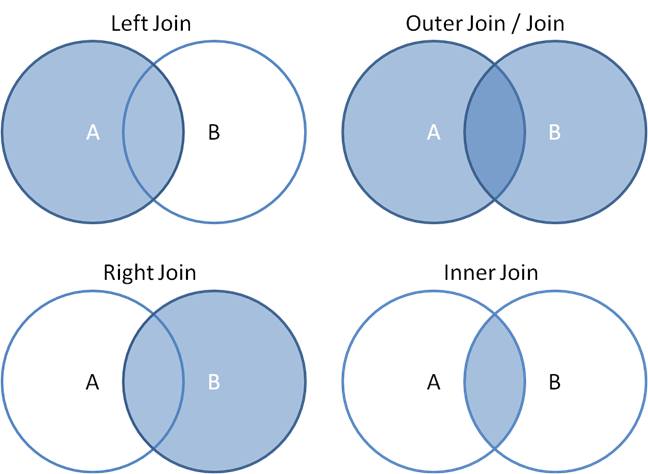

#### left

In [75]:
merged_left = bank.merge(users, on='CustomerId', how='left')
merged_left.shape

(9895, 14)

In [76]:
merged_left.isna().sum() # посмтореть пропущенные объекты

CustomerId         0
CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
Surname            0
Geography          0
Gender             0
Age                0
EstimatedSalary    0
target             0
dtype: int64

In [78]:
merged_left[merged_left['Age'].isna()] # посмтореть пропущенные объекты

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target


#### right

In [80]:
merge_right = bank.merge(users, on='CustomerId', how='right')
merge_right.shape

(10000, 14)

In [82]:
merge_right.isna().sum()

CustomerId           0
CreditScore        105
Tenure             105
Balance            105
NumOfProducts      105
HasCrCard          105
IsActiveMember     105
Exited             105
Surname              0
Geography            0
Gender               0
Age                  0
EstimatedSalary      0
target               0
dtype: int64

In [86]:
merge_right[merge_right['CreditScore'].isna()]

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
9895,15796764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bruno,Germany,F,56,80593.49,0
9896,15589420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Osinachi,France,F,40,183044.86,1
9897,15810563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ho,Spain,F,61,159938.82,0
9898,15746569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tsui,France,M,38,95483.48,1
9899,15811594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gordon,Spain,F,28,198069.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obijiaku,France,M,39,96270.64,1
9996,15569892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johnstone,France,M,35,101699.77,1
9997,15584532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liu,France,F,36,42085.58,1
9998,15682355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sabbatini,Germany,M,42,92888.52,0


#### inner

In [87]:
merge_inner = bank.merge(users, on='CustomerId', how='inner')
merge_inner.shape

(9895, 14)

In [89]:
merge_inner.isna().sum()

CustomerId         0
CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
Surname            0
Geography          0
Gender             0
Age                0
EstimatedSalary    0
target             0
dtype: int64

#### outer

In [94]:
merge_outer = bank.merge(users, on="CustomerId", how='outer')
merge_outer.shape

(10000, 14)

In [95]:
merge_outer.isna().sum()

CustomerId           0
CreditScore        105
Tenure             105
Balance            105
NumOfProducts      105
HasCrCard          105
IsActiveMember     105
Exited             105
Surname              0
Geography            0
Gender               0
Age                  0
EstimatedSalary      0
target               0
dtype: int64

## Методы группировок
### groupby
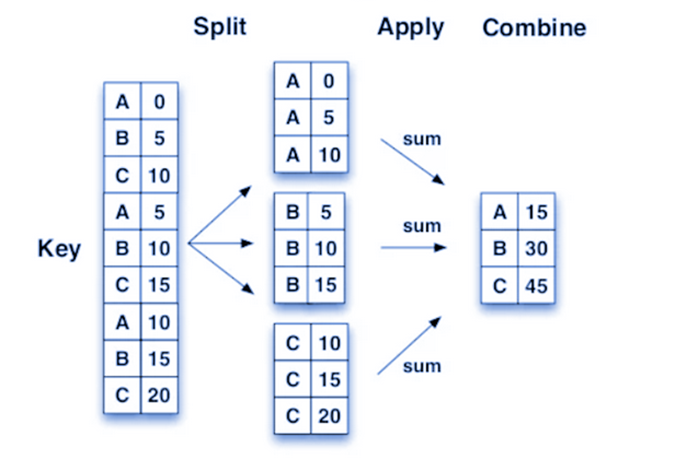

In [96]:
toy_df = pd.DataFrame({
 'client_id': [1, 2, 2, 3, 1, 1],
 'item': ['chocolate', 'cheese', 'ham', 'candy', 'chair', 'book'],
 'price': [68, 280, 302, 39, 2099, 1089]
})
toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [97]:
grouped = toy_df.groupby('client_id')
grouped

In [98]:
grouped.groups

{1: [0, 4, 5], 2: [1, 2], 3: [3]}

In [99]:
grouped.sum()

,price
client_id,
1,3256
2,582
3,39


In [100]:
grouped.agg({'price': ['sum', 'min', 'max']})

price           
            sum  min   max
client_id                 
1          3256   68  2099
2           582  280   302
3            39   39    39

In [101]:
users.groupby('Geography').agg({'Age': ['mean'], 
                               'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


### pivot_table

In [102]:
toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [103]:
toy_df.pivot_table(index='client_id',
                    values='price',
                    aggfunc='sum')

,price
client_id,
1,3256
2,582
3,39


In [107]:
users.pivot_table(index='Geography',
                 aggfunc={'Age': ['mean'], 'EstimatedSalary': 'min'})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


In [108]:
users.pivot_table(index='Geography',
                 columns='Gender',
                 values='EstimatedSalary',
                 aggfunc='mean',
                 margins=True,
                 margins_name='Total')

Gender,F,M,Total
Geography,,,
France,99564.252755,100174.252495,99899.180814
Germany,102446.424124,99905.033959,101113.435102
Spain,100734.107475,98425.687680,99440.572281
Total,100601.541382,99664.576931,100090.239881


### crosstab

In [109]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'])

Gender,F,M
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


In [110]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            values=users['EstimatedSalary'],
            aggfunc='mean')

Gender,F,M
Geography,,
France,99564.252755,100174.252495
Germany,102446.424124,99905.033959
Spain,100734.107475,98425.687680


In [111]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='all')

Gender,F,M
Geography,,
France,0.2261,0.2753
Germany,0.1193,0.1316
Spain,0.1089,0.1388


In [112]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='index')

Gender,F,M
Geography,,
France,0.450937,0.549063
Germany,0.475488,0.524512
Spain,0.439645,0.560355


In [113]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='columns')

Gender,F,M
Geography,,
France,0.497689,0.504490
Germany,0.262602,0.241158
Spain,0.239709,0.254352


## Встроенные визуализации

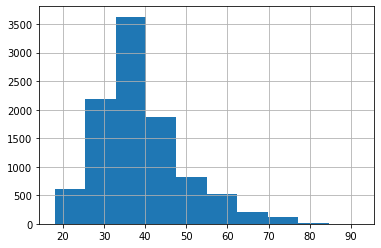

In [114]:
users['Age'].hist();

In [115]:
data = users.groupby('Gender').count()['Age']
data.name = 'Gender'
data

Gender
F    4543
M    5457
Name: Gender, dtype: int64

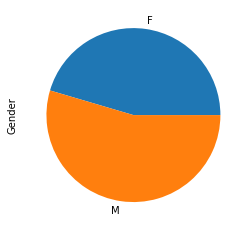

In [116]:
data.plot.pie(y='Gender');

C:\Users\tatia\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


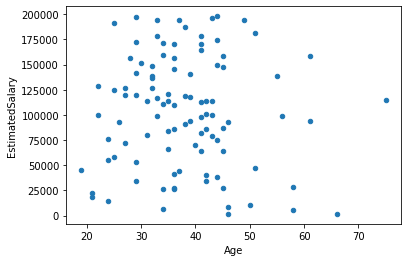

In [117]:
users.iloc[:100].plot.scatter(x='Age', y='EstimatedSalary');

In [118]:
data = bank.groupby('Tenure').count()['Balance']
data.name = 'num_clients'
data

Tenure
0      412
1     1023
2     1040
3     1000
4      975
5     1003
6      956
7     1015
8     1015
9      974
10     482
Name: num_clients, dtype: int64

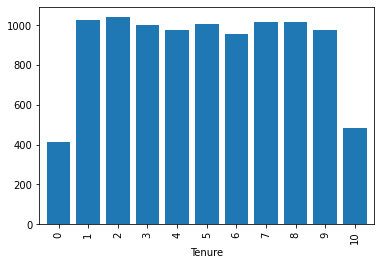

In [119]:
data.plot.bar(width=0.8);

In [182]:
df = pd.read_csv('./laptop_price.csv', encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### 1.1 Создать новый признак Cpu_Company, который будет содержать только название фирмы, которая произвела CPU

In [239]:
df['Cpu_Company'] = df['Cpu'].apply(lambda x: x.split()[0])
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD,1
1,1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage,0
2,2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD,1
3,3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD,1
4,4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD,1


### 1.2 Создать новый признак Memory_Amount, который будет содержать только количество Gb памяти без указания типа носителя

In [184]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [185]:
def memory(x):
    res = x.split()[0]
    if res.endswith('GB'):
        result = res.replace('GB', '')
    elif res.endswith('TB'):
        result = float(res.replace('TB', '')) * 1024
    return int(result)

In [186]:
df['Memory_Amount'] = df['Memory'].apply(memory)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,512
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,256


### 1.3 Создать новый признак Memory_Type, который будет содержать только тип носителя (HDD/SDD/др.)

In [187]:
df['Memory_Type'] = df['Memory'].apply(lambda x: x.replace(' ', '').split('B')[-1])
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128,FlashStorage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,512,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,256,SSD


In [188]:
df['Memory_Type'].value_counts()

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

### 1.4 Удалите признаки Memory и ScreenResolution

In [189]:
df.drop(columns=['Memory', 'ScreenResolution'], inplace=True)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128,FlashStorage
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,512,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,256,SSD


## Задание 2.
### 2.1 Создайте признак SSD, который изначально равен 0

In [190]:
df['SSD'] = 0
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128,SSD,0
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128,FlashStorage,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256,SSD,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,512,SSD,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,256,SSD,0


### 2.2 Поставьте в признаке SSD 1, если ноутбук действительно с типом носителя SSD

In [191]:
df.loc[df['Memory_Type'] == 'SSD', 'SSD'] = 1
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128,SSD,1
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128,FlashStorage,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256,SSD,1
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,512,SSD,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,256,SSD,1


### 2.3 Уберите в признаке Weight значения 'kg' и поменяйте его тип данных на вещественный

In [192]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD,1
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD,1
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD,1


In [193]:
df['Weight'].dtype

dtype('float64')

## Задание 3.
### Создайте датафрейм с клиентами:
```
clients = pd.DataFrame({
 'client_id': [45, 32, 67, 33, 43],
 'laptop_id': [506, 398, 710, 120, 1999]
})
```
laptop_id - это индексы датафрейма с ноутбуками

In [208]:
clients = pd.DataFrame({
 'client_id': [45, 32, 67, 33, 43],
 'laptop_id': [506, 398, 710, 120, 1999]
})
clients

,client_id,laptop_id
0,45,506
1,32,398
2,67,710
3,33,120
4,43,1999


### 3.1 Присоедините к таблице clients данные по ноутбукам через метод join

In [199]:
clients_id = clients.set_index('laptop_id')

In [200]:
clients_id.join(df)

,client_id,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
laptop_id,,,,,,,,,,,,,,,,
506,45,513.0,Asus,ZenBook UX510UX-CN211T,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8GB,Intel HD Graphics 620,Windows 10,2.00,1224.0,Intel,256.0,HDD,0.0
398,32,405.0,Dell,Precision M5520,Workstation,15.6,Intel Core i7 7700HQ 2.8GHz,8GB,Nvidia Quadro M1200,Windows 10,1.78,2712.0,Intel,256.0,SSD,1.0
710,67,718.0,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8GB,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,1249.0,Intel,128.0,HDD,0.0
120,33,123.0,Acer,Spin 3,Notebook,15.6,Intel Core i3 7100U 2.4GHz,6GB,Intel HD Graphics 620,Windows 10,2.10,479.0,Intel,1024.0,HDD,0.0
1999,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2 Присоедините к таблице clients данные по ноутбукам через метод merge
Это нужно, чтобы понимать, какие ноутбуки покупались клиентами

In [209]:
merge = clients.merge(df, left_on='laptop_id', right_on='laptop_ID')
merge
# merge = users.merge(bank, left_on='CustomerId', right_on='CustomerId')

,client_id,laptop_id,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,45,506,506,Asus,ZenBook UX510UX-CN211T,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8GB,Intel HD Graphics 620,Windows 10,2.00,1224.0,Intel,256,HDD,0
1,32,398,398,Dell,Precision M5520,Workstation,15.6,Intel Core i7 7700HQ 2.8GHz,8GB,Nvidia Quadro M1200,Windows 10,1.78,2712.0,Intel,256,SSD,1
2,67,710,710,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8GB,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,1249.0,Intel,128,HDD,0
3,33,120,120,Acer,Spin 3,Notebook,15.6,Intel Core i3 7100U 2.4GHz,6GB,Intel HD Graphics 620,Windows 10,2.10,479.0,Intel,1024,HDD,0


## Задание 4.
Составьте несколько сводных таблиц
### 4.1 Найдите среднюю стоимость ноутбуков в зависимости от компании производителя
Отсортируйте от меньшей стоимости к большей

In [221]:
df.groupby('Company')['Price_euros'].mean().sort_values()

Company
Vero          217.425000
Mediacom      295.000000
Chuwi         314.296667
Acer          626.775825
Fujitsu       729.000000
HP           1067.774854
Lenovo       1086.384444
Asus         1104.169367
Xiaomi       1133.462500
Dell         1186.068990
Toshiba      1267.812500
Samsung      1413.444444
Huawei       1424.000000
Apple        1564.198571
Microsoft    1612.308333
Google       1677.666667
MSI          1728.908148
LG           2099.000000
Razer        3346.142857
Name: Price_euros, dtype: float64

### 4.2 Найдите минимальную, среднюю и максимальную стоимости ноутбуков в зависимости от производителя процессора

In [223]:
df.groupby('Cpu_Company')['Price_euros'].agg(['min', 'mean', 'max'])

,min,mean,max
Cpu_Company,,,
AMD,199.0,560.638871,2199.0
Intel,174.0,1152.214145,6099.0
Samsung,659.0,659.000000,659.0


In [224]:
df.groupby('Cpu_Company').agg({'Price_euros': ['min', 'mean', 'max']})

Price_euros                     
                    min         mean     max
Cpu_Company                                 
AMD               199.0   560.638871  2199.0
Intel             174.0  1152.214145  6099.0
Samsung           659.0   659.000000   659.0

### 4.3 Постройте таблицу с подсчетом количества ноутбуков в данных в зависимости от производителя CPU и ОЗУ

In [227]:
df.pivot_table(index='Cpu_Company',
               columns='Ram',
               values='Weight',
               aggfunc='count')

Ram,12GB,16GB,24GB,2GB,32GB,4GB,64GB,6GB,8GB
Cpu_Company,,,,,,,,,
AMD,2.0,3.0,NaN,1.0,NaN,31.0,NaN,13.0,12.0
Intel,23.0,197.0,3.0,21.0,17.0,343.0,1.0,28.0,607.0
Samsung,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### 4.4 Постройте таблицу с подсчетом средней стоимости ноутбуков в данных в зависимости от операционной системы и GB памяти

In [229]:
df.pivot_table(index='OpSys',
               columns='Memory_Amount',
               values='Price_euros',
               aggfunc='mean',
               fill_value=0)

Memory_Amount,8,16,32,64,128,180,240,256,500,508,512,1024,2048
OpSys,,,,,,,,,,,,,
Android,0,0.00,0.000000,434.000000,0.000000,0.0,0,0.000000,0.000000,0,0.000000,0.000000,0.0000
Chrome OS,0,305.38,412.454545,774.333333,1275.000000,0.0,0,1559.000000,0.000000,0,2199.000000,0.000000,0.0000
Linux,0,0.00,0.000000,0.000000,742.250000,0.0,0,811.638125,389.056364,0,0.000000,581.401290,0.0000
Mac OS X,0,0.00,0.000000,0.000000,1099.000000,0.0,0,1311.994000,0.000000,0,1222.000000,0.000000,0.0000
No OS,0,0.00,0.000000,0.000000,562.140000,0.0,0,782.989286,404.675385,0,1098.500000,540.539600,594.0000
Windows 10,2249,0.00,270.001471,499.716000,1026.489167,1073.5,3100,1334.456872,664.717647,0,1911.985285,904.827906,666.9475
Windows 10 S,0,0.00,0.000000,308.995000,1039.000000,0.0,0,1668.950000,0.000000,0,2589.000000,0.000000,0.0000
Windows 7,0,0.00,0.000000,0.000000,1320.323333,1199.0,0,1846.466800,924.048333,1002,2235.396667,1539.666667,0.0000
macOS,0,0.00,0.000000,0.000000,1119.315000,0.0,0,1600.370000,0.000000,0,2180.870000,0.000000,0.0000


## Задание 5*.
Ответьте на несколько вопросов
### 5.1 Ноутбуков каких компаний и с каким процессором больше?

In [235]:
pd.crosstab(index=df['Company'],
            columns=df['Cpu_Company'])

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,10,93,0
Apple,0,21,0
Asus,11,147,0
Chuwi,0,3,0
Dell,0,297,0
Fujitsu,0,3,0
Google,0,3,0
HP,25,249,0
Huawei,0,2,0


### 5.2 С каким типом памяти и с каким объемом памяти больше ноутбуков?

In [237]:
pd.crosstab(index=df['Memory_Type'],
            columns=df['Memory_Amount'])

Memory_Amount,8,16,32,64,128,180,240,256,500,508,512,1024,2048
Memory_Type,,,,,,,,,,,,,
FlashStorage,0,7,38,15,4,0,0,8,0,0,2,0,0
HDD,0,0,1,1,97,0,0,85,132,0,17,227,16
Hybrid,0,0,0,0,0,0,0,1,0,1,1,9,0
SSD,1,3,6,1,76,5,1,414,0,0,120,14,0
